## Title: Intrusion Detection System Using ML and RL
## Course Name: CSE 543 - Information Assurance and Security

### Group: 10
### Group Members:
    

1. Abhay Jogenipalli (1233204793)
2. Kumar Hasti (1233389614)
3. Kruthika Suresh (1233969895)
4. Sakshi Sheth (1233820538)
5. Rahul Tallam (1233313239)
6. Rushir Bhavsar (1230672263)
7. Subharajit Pallob (1232562203)
8. Varshil Shah (1225739892)



# NOTE: Code Runtime ~ 7 Hours with GPU, 14 Hours with CPU. Data Loading is via Kaggle, Original Data hosted on Kaggle ~ 15 GB

## Data Handling

### Dataset Import:
Whole Dataset has been Chunked for Ease on Memory Load and Training Times

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfuqnidsv2-network-intrusion-detection-dataset/NF-UQ-NIDS-v2.csv


In [ ]:
# , usecols = ['IPV4_SRC_ADDR','L4_SRC_PORT','IPV4_DST_ADDR','L4_DST_PORT','PROTOCOL','L7_PROTO','IN_BYTES','IN_PKTS','OUT_BYTES','OUT_PKTS','TCP_FLAGS','CLIENT_TCP_FLAGS','SERVER_TCP_FLAGS','FLOW_DURATION_MILLISECONDS','DURATION_IN','MIN_TTL','MAX_TTL','LONGEST_FLOW_PKT','SHORTEST_FLOW_PKT','MIN_IP_PKT_LEN','MAX_IP_PKT_LEN','SRC_TO_DST_SECOND_BYTES','DST_TO_SRC_SECOND_BYTES','SRC_TO_DST_AVG_THROUGHPUT','DST_TO_SRC_AVG_THROUGHPUT','NUM_PKTS_UP_TO_128_BYTES','TCP_WIN_MAX_IN','TCP_WIN_MAX_OUT','ICMP_TYPE','ICMP_IPV4_TYPE','DNS_QUERY_ID','DNS_QUERY_TYPE','DNS_TTL_ANSWER','FTP_COMMAND_RET_CODE','Label','Attack']
df = pd.read_csv('/kaggle/input/nfuqnidsv2-network-intrusion-detection-dataset/NF-UQ-NIDS-v2.csv',chunksize=1000000)

In [ ]:
df1 = pd.DataFrame(df.get_chunk(450000))

### Label Encoding for IP Addresses:
Unique IP Address are identifiers for users in the network, hence this are required to be label encoded to retain uniqueness.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
srcaddr= LE.fit_transform(df1['IPV4_SRC_ADDR'])
df1['IPV4_SRC_ADDR'] = pd.Series(srcaddr)

In [ ]:
dstaddr= LE.fit_transform(df1['IPV4_DST_ADDR'])
df1['IPV4_DST_ADDR'] = pd.Series(dstaddr)

### Data Preprocessing:

Basic Data processing involving column extraction and imputation for missing value handling.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X = df1.drop(['Attack','Label','Dataset'], axis=1)
Y = df1["Label"]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X_object = X.select_dtypes("object")
X_int = X.select_dtypes(exclude = "object")

X_columns = X_int.columns

imputer.fit(X_int)
X_int = imputer.transform(X_int)
X_int = pd.DataFrame(X_int)
X_int.columns = X_columns

X_object = X_object.fillna("unknown")
X = X_object.join(X_int)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Correlation Map for Feature Engineering

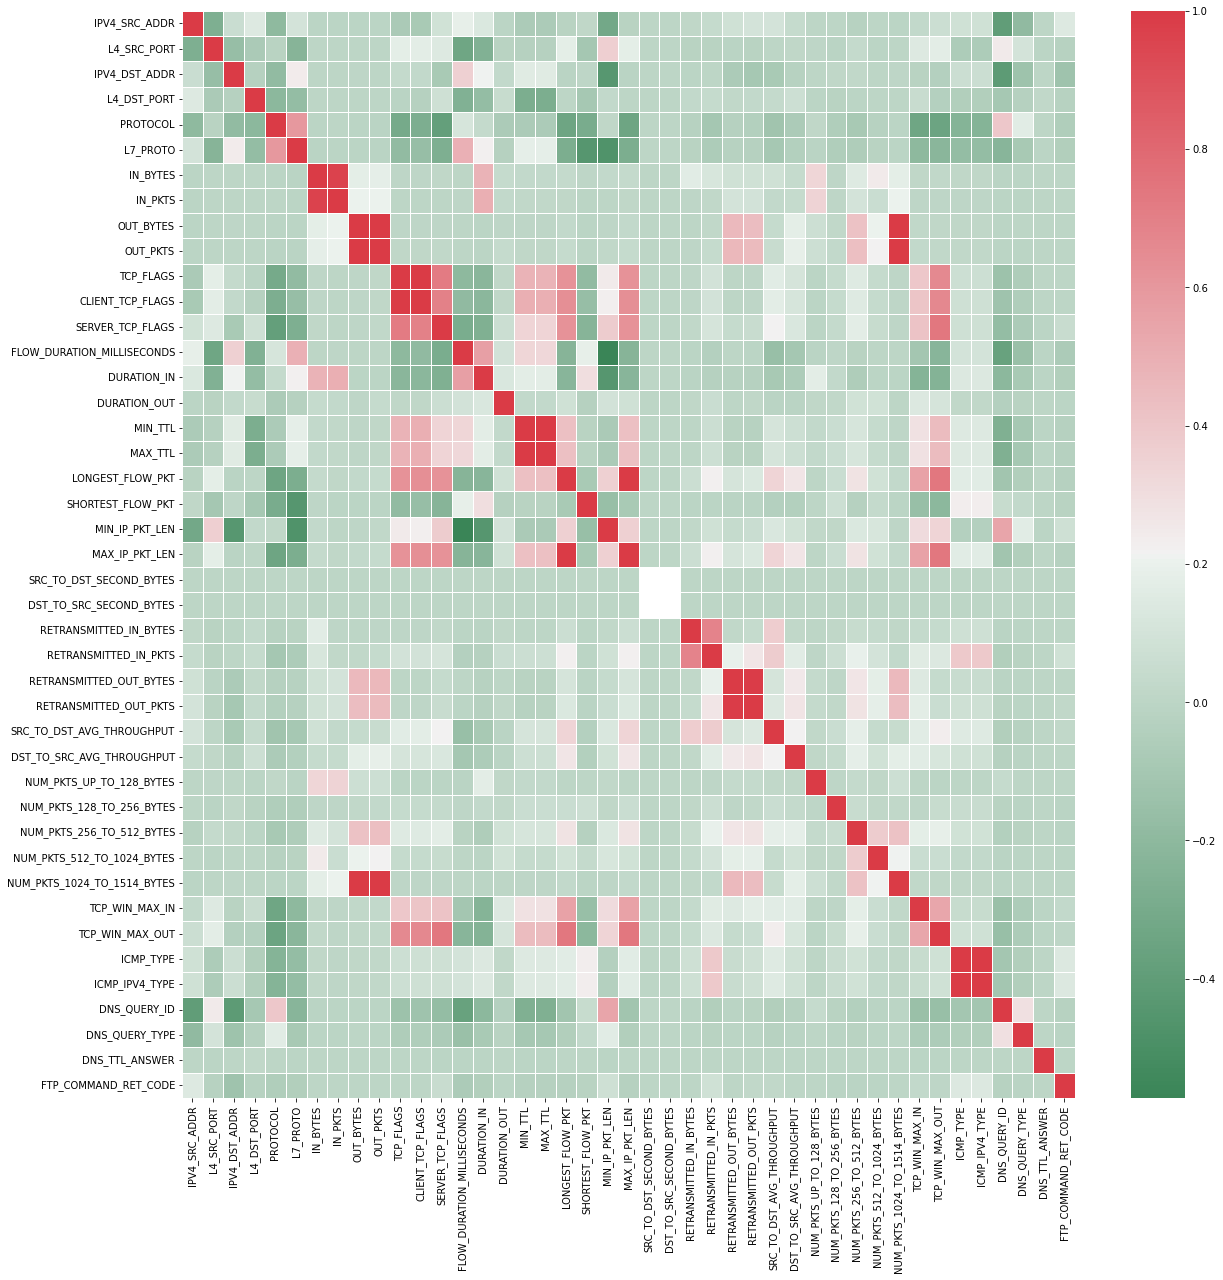

In [ ]:
plt.figure(figsize = (20,20))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
attrb_reln = sns.heatmap(X.corr(),linewidths=0.5, cmap=cmap)
plt.savefig('correlations_dataset.jpg', dpi=1000)

## Machine Learning Suite

### Binary Classification - Anomaly Detection

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
# store the columns
cols = X_train.columns

# transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = cols)

In [ ]:
X_train_scaled.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier();

rfc.fit(X_train_scaled, y_train)

feature_imp = pd.DataFrame({'Importance':rfc.feature_importances_,'feature':X_train.columns})
feature_imp = feature_imp.sort_values('Importance',ascending=False).set_index('feature')
print(f"Feature Importance: {feature_imp}")

Feature Importance:                                Importance
feature                                  
IPV4_DST_ADDR                2.137070e-01
FLOW_DURATION_MILLISECONDS   1.009410e-01
IPV4_SRC_ADDR                7.400725e-02
DURATION_IN                  7.053421e-02
DST_TO_SRC_AVG_THROUGHPUT    6.592767e-02
L4_DST_PORT                  6.108245e-02
L7_PROTO                     5.020622e-02
MAX_TTL                      3.514485e-02
MAX_IP_PKT_LEN               3.357012e-02
LONGEST_FLOW_PKT             2.990801e-02
MIN_TTL                      2.907609e-02
DNS_TTL_ANSWER               2.469453e-02
SRC_TO_DST_AVG_THROUGHPUT    2.342975e-02
TCP_WIN_MAX_IN               2.219047e-02
MIN_IP_PKT_LEN               2.037975e-02
OUT_BYTES                    1.959897e-02
IN_BYTES                     1.435071e-02
IN_PKTS                      1.422134e-02
L4_SRC_PORT                  1.374034e-02
SHORTEST_FLOW_PKT            1.290148e-02
OUT_PKTS                     9.989482e-03
NUM_PKTS_UP_TO

In [ ]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, verbose=1)
selector.fit(X_train_scaled, y_train)

X_train_scaled = selector.transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


In [ ]:
from sklearn import datasets, metrics, tree, svm, neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
SEED = 42

# Decision Tree Model
print("Loading DT Classifier")
dtc = DecisionTreeClassifier()

# SVC MODEL
from sklearn.svm import SVC
print("Loading SVC Classifier")
svc = SVC(random_state = SEED)

# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
print("Loading LR Classifier")
lr = LogisticRegression()

# GAUSSIAN NAIVE BAYES
print("Loading Gaussian NB Classifier")
gnb = GaussianNB()

# BERNOULLI NAIVE BAYES
print("Loading Bernoulli NB Classifier")
bnb = BernoulliNB()

# Train RandomForestClassifier
print("Loading RFC Classifier")
rfe = RandomForestClassifier(max_depth=6)

# Train XGBOOST Classifier
from xgboost import XGBClassifier
print("Loading XGB Classifier")
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
print("Loading the LGBM Classifier")
lgbmc = LGBMClassifier(random_state=SEED)

# Train Gradient-Boosting Classifier
print("Loading the GB Classifier")
grb = GradientBoostingClassifier(learning_rate=1.1)

Loading DT Classifier
Loading SVC Classifier
Loading LR Classifier
Loading Gaussian NB Classifier
Loading Bernoulli NB Classifier
Loading RFC Classifier
Loading XGB Classifier


Loading the LGBM Classifier
Loading the GB Classifier


### Cross Validation based Binary Classification

In [ ]:
from sklearn.model_selection import cross_val_score
models_cvs = {}
models_cvs['SVC']= svc
models_cvs['LogisticRegression']= lr
models_cvs['DecisionTreeClassifier']= dtc
models_cvs['Gaussian Naive Bayes Classifier']= gnb
models_cvs['Bernoulli Naive Bayes Classifier']= bnb
models_cvs['Gradient Boosting Classifier']= grb
models_cvs['Random Forest Classifier']= rfe
models_cvs['XGBoost Classifier']= xgbc
models_cvs['LightGBM Classifier']= lgbmc
scores = {}
for name in models_cvs:
    print(f"Cross Validating Model: {name}")
    scores[name]={}
    for scorer in ['precision','recall','accuracy']:
        scores[name][scorer] = cross_val_score(models_cvs[name], X_train_scaled, y_train, cv=3, scoring=scorer, n_jobs=-1)

Cross Validating Model: SVC
Cross Validating Model: LogisticRegression
Cross Validating Model: DecisionTreeClassifier
Cross Validating Model: Gaussian Naive Bayes Classifier
Cross Validating Model: Bernoulli Naive Bayes Classifier
Cross Validating Model: Gradient Boosting Classifier
Cross Validating Model: Random Forest Classifier
Cross Validating Model: XGBoost Classifier
Cross Validating Model: LightGBM Classifier


In [ ]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models_cvs:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall','accuracy']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

************************ SVC Model Validation ************************
Mean precision: 
 94.78 % +- 0.17

Mean recall: 
 97.96 % +- 0.08

Mean accuracy: 
 95.02 % +- 0.07

**************** LogisticRegression Model Validation ****************
Mean precision: 
 92.43 % +- 0.26

Mean recall: 
 88.27 % +- 0.45

Mean accuracy: 
 87.28 % +- 0.32

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.59 % +- 0.0

Mean recall: 
 99.62 % +- 0.04

Mean accuracy: 
 99.46 % +- 0.03

********** Gaussian Naive Bayes Classifier Model Validation **********
Mean precision: 
 87.91 % +- 0.35

Mean recall: 
 96.93 % +- 0.35

Mean accuracy: 
 88.99 % +- 0.09

********* Bernoulli Naive Bayes Classifier Model Validation *********
Mean precision: 
 95.77 % +- 0.08

Mean recall: 
 79.76 % +- 0.09

Mean accuracy: 
 84.06 % +- 0.11

*********** Gradient Boosting Classifier Model Validation ***********
Mean precision: 
 99.52 % +- 0.03

Mean recall: 
 99.52 % +- 0.07

Mean ac

### Multi-Class Intrusion type detection :

Intrusion type detection for attack type increases system complexity

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
X1 = df1.drop(['Attack','Label','Dataset'], axis=1)
Y1 = df1["Attack"]

In [ ]:
LE = LabelEncoder()
multilbl = LE.fit_transform(Y1)
Y1 = pd.Series(multilbl)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X1_object = X1.select_dtypes("object")
X1_int = X1.select_dtypes(exclude = "object")

X1_columns = X1_int.columns

imputer.fit(X1_int)
X1_int = imputer.transform(X1_int)
X1_int = pd.DataFrame(X1_int)
X1_int.columns = X1_columns

X1_object = X1_object.fillna("unknown")
X1 = X1_object.join(X1_int)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, Y1, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
# store the columns
cols = X_train_1.columns

# transform the data
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns = cols)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns = cols)

In [ ]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, verbose=1)
selector.fit(X_train_scaled_1, y_train_1)

X_train_scaled_1 = selector.transform(X_train_scaled_1)
X_test_scaled_1 = selector.transform(X_test_scaled_1)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


In [ ]:
models_1 = {}
models_1['SVC']= svc
models_1['LogisticRegression']= lr
models_1['DecisionTreeClassifier']= dtc
models_1['Gaussian Naive Bayes Classifier']= gnb
models_1['Bernoulli Naive Bayes Classifier']= bnb
models_1['Gradient Boosting Classifier']= grb
models_1['Random Forest Classifier']= rfe
models_1['XGBoost Classifier']= xgbc
models_1['LightGBM Classifier']= lgbmc
preds_1={}
modelAcc_1={}
modelPrec_1={}
modelRec_1={}
for name in models_1:
    print(f"Training Model: {name}")
    models_1[name].fit(X_train_scaled_1, y_train_1)
    print("Model Fitted, Evaluating.....")
    preds_1[name] = models_1[name].predict(X_test_scaled_1)
    modelAcc_1[name] = accuracy_score(y_test_1, preds_1[name])
    modelPrec_1[name] = precision_score(y_test_1, preds_1[name], average='weighted', labels=np.unique(preds_1[name]))
    modelRec_1[name] = recall_score(y_test_1, preds_1[name], average='weighted', labels=np.unique(preds_1[name]))
print("Predictions complete.")

Training Model: SVC
Model Fitted, Evaluating.....
Training Model: LogisticRegression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model Fitted, Evaluating.....
Training Model: DecisionTreeClassifier
Model Fitted, Evaluating.....
Training Model: Gaussian Naive Bayes Classifier
Model Fitted, Evaluating.....


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Model: Bernoulli Naive Bayes Classifier
Model Fitted, Evaluating.....


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Model: Gradient Boosting Classifier
Model Fitted, Evaluating.....
Training Model: Random Forest Classifier
Model Fitted, Evaluating.....
Training Model: XGBoost Classifier
Model Fitted, Evaluating.....
Training Model: LightGBM Classifier
Model Fitted, Evaluating.....
Predictions complete.


In [ ]:
for name in models_1:
    print("Model : ",models_1[name]," - Accuracy : ",modelAcc_1[name])
    print("Model : ",models_1[name]," - Precision : ",modelPrec_1[name])
    print("Model : ",models_1[name]," - Recall : ",modelRec_1[name])
    print()

Model :  SVC(random_state=42)  - Accuracy :  0.9326666666666666
Model :  SVC(random_state=42)  - Precision :  0.9344751753274337
Model :  SVC(random_state=42)  - Recall :  0.9335223955292351

Model :  LogisticRegression()  - Accuracy :  0.8368166666666667
Model :  LogisticRegression()  - Precision :  0.8200184487530662
Model :  LogisticRegression()  - Recall :  0.8395873047724156

Model :  DecisionTreeClassifier()  - Accuracy :  0.9862
Model :  DecisionTreeClassifier()  - Precision :  0.986457850347954
Model :  DecisionTreeClassifier()  - Recall :  0.9862328744291476

Model :  GaussianNB()  - Accuracy :  0.6137833333333333
Model :  GaussianNB()  - Precision :  0.8991519796758787
Model :  GaussianNB()  - Recall :  0.613803793459782

Model :  BernoulliNB()  - Accuracy :  0.7101666666666666
Model :  BernoulliNB()  - Precision :  0.797798781396813
Model :  BernoulliNB()  - Recall :  0.7133888061075859

Model :  GradientBoostingClassifier(learning_rate=1.1)  - Accuracy :  0.0396833333333333

## Deep Learning Approach for Attack-classification and Transfer Learning

In [ ]:
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
# store the columns
cols = X1.columns
# transform the data
X1_dl = scaler.fit_transform(X1)
X1_dl = pd.DataFrame(X1_dl, columns = cols)

from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(Y1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X1_dl, y_cat, test_size=0.2)

In [ ]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, verbose = 1)
selector.fit(X_train_dl, y_train_dl)

X_train_dl = selector.transform(X_train_dl)
X_test_dl = selector.transform(X_test_dl)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


In [ ]:
print(np.shape(X_train_dl)[1], np.shape(X_test_dl)[1])
print(np.shape(y_train_dl)[1], np.shape(y_test_dl)[1])

21 21
20 20


In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=21, activation='relu'))
model.add(Dense(35, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(20, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy', Precision(), Recall()])

In [ ]:
import tensorflow as tf

with tf.device('/gpu:0'):
    k = model.fit(X_train_dl ,y_train_dl, verbose=2, epochs=300, batch_size=384 , validation_data=(X_test_dl, y_test_dl), use_multiprocessing=True)

Epoch 1/300
209/209 - 3s - loss: 1.3840 - accuracy: 0.6593 - precision_6: 0.8308 - recall_6: 0.4970 - val_loss: 0.6638 - val_accuracy: 0.8108 - val_precision_6: 0.8561 - val_recall_6: 0.7677
Epoch 2/300
209/209 - 1s - loss: 0.5560 - accuracy: 0.8293 - precision_6: 0.8991 - recall_6: 0.7770 - val_loss: 0.4684 - val_accuracy: 0.8569 - val_precision_6: 0.9315 - val_recall_6: 0.7923
Epoch 3/300
209/209 - 1s - loss: 0.4264 - accuracy: 0.8696 - precision_6: 0.9338 - recall_6: 0.8069 - val_loss: 0.3909 - val_accuracy: 0.8816 - val_precision_6: 0.9387 - val_recall_6: 0.8213
Epoch 4/300
209/209 - 1s - loss: 0.3670 - accuracy: 0.8854 - precision_6: 0.9452 - recall_6: 0.8296 - val_loss: 0.3411 - val_accuracy: 0.8941 - val_precision_6: 0.9546 - val_recall_6: 0.8424
Epoch 5/300
209/209 - 1s - loss: 0.3282 - accuracy: 0.8989 - precision_6: 0.9523 - recall_6: 0.8506 - val_loss: 0.3073 - val_accuracy: 0.9086 - val_precision_6: 0.9548 - val_recall_6: 0.8633
Epoch 6/300
209/209 - 1s - loss: 0.2982 - acc

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
mean = sum(k.history['accuracy']) / len(k.history['accuracy'])
variance = sum([((x - mean) ** 2) for x in k.history['accuracy']]) / len(k.history['accuracy'])
res = variance ** 0.5
print("Baseline Training Accuracy: %.2f%% (%.2f%%)" % (mean*100, res*100))

Baseline Training Accuracy: 96.09% (2.31%)


In [ ]:
mean = sum(k.history['val_accuracy']) / len(k.history['val_accuracy'])
variance = sum([((x - mean) ** 2) for x in k.history['val_accuracy']]) / len(k.history['val_accuracy'])
res = variance ** 0.5
print("Baseline Validation Accuracy: %.2f%% (%.2f%%)" % (mean*100, res*100))

Baseline Validation Accuracy: 96.17% (1.58%)


In [ ]:
for i in ['precision_6', 'val_precision_6']:
    mean = sum(k.history[i]) / len(k.history[i])
    variance = sum([((x - mean) ** 2) for x in k.history[i]]) / len(k.history[i])
    res = variance ** 0.5
    if i == 'precision_6':
        print(f"Baseline Model Precsion: %.2f%% (%.2f%%)" % (mean*100, res*100))
    elif i == 'val_precision_6':
        print(f"Baseline Model Validation Precsion: %.2f%% (%.2f%%)" % (mean*100, res*100))

Baseline Model precision_6: 96.88% (1.07%)
Baseline Model val_precision_6: 96.90% (0.87%)


In [ ]:
for i in ['recall_6', 'val_recall_6']:
    mean = sum(k.history[i]) / len(k.history[i])
    variance = sum([((x - mean) ** 2) for x in k.history[i]]) / len(k.history[i])
    res = variance ** 0.5
    if i == 'recall_6':
        print(f"Baseline Model Recall %.2f%% (%.2f%%)" % (mean*100, res*100))
    elif i == 'val_recall_6':
        print(f"Baseline Model Validation Recall: %.2f%% (%.2f%%)" % (mean*100, res*100))

Baseline Model Recall 95.41% (3.48%)
Baseline Model Validation Recall: 95.55% (2.33%)


## RL - DQN Model - Attack-type Classification

In [ ]:
label_mapping = {label_num: attack_name for label_num, attack_name in enumerate(LE.classes_)}

# Print the label mapping
print("Label Mapping:")
for label_num, attack_name in label_mapping.items():
    print(f"{label_num}: {attack_name}")

Label Mapping:
0: Analysis
1: Backdoor
2: Benign
3: Bot
4: Brute Force
5: DDoS
6: DoS
7: Exploits
8: Fuzzers
9: Generic
10: Infilteration
11: Reconnaissance
12: Shellcode
13: Theft
14: injection
15: mitm
16: password
17: ransomware
18: scanning
19: xss


In [ ]:
!pip install shimmy>=0.2.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
thinc 8.0.16 requires typing-extensions<4.0.0.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.7.1 which is incompatible.
tensorflow 2.6.4 requires absl-py~=0.10, but you have absl-py 1.0.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.7.1 which is incompatible.
tensorflow 2.6.4 requires wrapt~=1.12.1, but you have wrapt 1.14.1 which is incompatible.
tensorflow-transform 1.8.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<2.9,>=

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PyTorchModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(PyTorchModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 30)
        self.fc2 = nn.Linear(30, 35)
        self.fc3 = nn.Linear(35, 30)
        self.fc4 = nn.Linear(30, 25)
        self.fc5 = nn.Linear(25, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)  # No activation here; DQN uses raw Q-values
        return x

In [ ]:
# Extract weights from the Keras model
keras_weights = []
for layer in model.layers:
    weights = layer.get_weights()  # This returns a list of NumPy arrays
    keras_weights.append(weights)

In [ ]:
import numpy as np

# Create an instance of the PyTorch model
input_dim = X_train_dl.shape[1]
num_classes = 21  # Number of classes/actions
pytorch_model = PyTorchModel(input_dim, num_classes)

# Map Keras layers to PyTorch layers
pytorch_layers = [pytorch_model.fc1, pytorch_model.fc2, pytorch_model.fc3, pytorch_model.fc4, pytorch_model.fc5]

# Assign weights
for idx, layer in enumerate(pytorch_layers):
    weights, biases = keras_weights[idx]
    weights = weights.T  # Transpose weights to match PyTorch format
    layer.weight.data = torch.from_numpy(weights).float()
    layer.bias.data = torch.from_numpy(biases).float()

In [ ]:
!pip install stable-baselines3 gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 9.2 MB/s eta 0:00:00


In [ ]:
import gym
from gym import spaces
import numpy as np

In [ ]:
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

class CustomFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space):
        super(CustomFeatureExtractor, self).__init__(observation_space, features_dim=25)
        # Use the pre-trained model up to the last hidden layer
        self.model = nn.Sequential(
            pytorch_model.fc1,
            nn.ReLU(),
            pytorch_model.fc2,
            nn.ReLU(),
            pytorch_model.fc3,
            nn.ReLU(),
            pytorch_model.fc4,
            nn.ReLU(),
        )

    def forward(self, observations):
        x = observations
        # Ensure the input is a torch tensor
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, dtype=torch.float32)
        return self.model(x)

In [ ]:
class IntrusionDetectionEnv(gym.Env):
    def __init__(self, X, y):
        super(IntrusionDetectionEnv, self).__init__()
        # Convert X and y to numpy arrays for integer indexing
        self.X = np.array(X)
        self.y = np.array(y).astype(int).flatten()
        self.current_step = 0
        self.action_space = spaces.Discrete(20)  # Assuming 21 possible classes
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.X.shape[1],), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        # Add an extra dimension to the observation to match the expected shape
        return np.array([self.X[self.current_step]], dtype=np.float32)

    def step(self, action):
        correct_action = int(self.y[self.current_step])
        action = int(action)
        # Apply your reward policy
        if action == correct_action:
            reward = 2
        elif correct_action != 0 and action == 0:
            reward = -3
        else:
            reward = -1
        self.current_step += 1
        done = self.current_step >= len(self.y)
        if not done:
            observation = self.X[self.current_step].astype(np.float32)
        else:
            observation = np.zeros(self.X.shape[1], dtype=np.float32)
        # Return the correct action in the info dictionary
        info = {'correct_action': correct_action}
        return observation, reward, done, info

    def seed(self, seed=None):
        np.random.seed(seed)

    def render(self, mode='human'):
        pass

In [ ]:
from stable_baselines3.dqn.policies import DQNPolicy

class CustomDQNPolicy(DQNPolicy):
    def __init__(self, observation_space, action_space, lr_schedule, **kwargs):
        # Define the network architecture to match your pre-trained model
        net_arch = [30, 35, 30, 25]
        super(CustomDQNPolicy, self).__init__(
            observation_space,
            action_space,
            lr_schedule,
            net_arch=net_arch,
            features_extractor_class=CustomFeatureExtractor,
            features_extractor_kwargs={},
            **kwargs
        )

In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env

# Wrap the environment for training
env = make_vec_env(lambda: IntrusionDetectionEnv(X_train_dl, y_train_dl), n_envs=1)

# Define and train the DQN model using the custom policy
model_dqn = DQN(
    policy=CustomDQNPolicy,
    env=env,
    learning_rate=0.001,          # Learning Rate (α)
    buffer_size=100000,           # Replay Memory Size
    learning_starts=1000,         # Number of steps before training starts
    batch_size=64,                # Batch Size
    gamma=0.99,                   # Discount Factor (γ)
    train_freq=1,                 # Train the model every step
    gradient_steps=1,             # Number of gradient steps
    target_update_interval=1000,  # Update the target network every 1000 steps
    exploration_initial_eps=1.0,  # Initial exploration rate (ε)
    exploration_final_eps=0.01,   # Final exploration rate (ε)
    exploration_fraction=0.5,     # Fraction of training where ε decays
    verbose=2
)


# Optionally, copy the last layer weights from your pre-trained model to the DQN model's q_net
with torch.no_grad():
    # Access the last layer of the q_net.q_net Sequential module
    model_dqn.q_net.q_net[-1].weight.data.copy_(pytorch_model.fc5.weight.data)
    model_dqn.q_net.q_net[-1].bias.data.copy_(pytorch_model.fc5.bias.data)

total_timesteps = 50000
print(total_timesteps)

Using cuda device
50000


In [ ]:
# Train the DQN model
model_dqn.learn(total_timesteps=total_timesteps, progress_bar=True)

  29% ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14,567/50,000  [ 0:01:27 < 0:03:56 , 150 it/s ]

In [ ]:
action_labels = {
    0: "Analysis",
    1: "Backdoor",
    2: "Benign",
    3: "Bot",
    4: "Brute Force",
    5: "DDoS",
    6: "DoS",
    7: "Exploits",
    8: "Fuzzers",
    9: "Generic",
    10: "Infiltration",
    11: "Reconnaissance",
    12: "Shellcode",
    13: "Theft",
    14: "Worms",
    15: "Injection",
    16: "MITM",
    17: "Password",
    18: "Ransomware",
    19: "Scanning",
    20: "XSS"
}

# Initialize the test environment
test_env = IntrusionDetectionEnv(X_test_dl, y_test_dl)

# Reset the environment to start at the beginning of the test set
obs = test_env.reset()
done = False
total_reward = 0  # To track cumulative reward over the test set
actions_taken = []  # Track each action taken by the model for analysis
true_labels = []    # Track true labels for evaluation

print("Evaluation Results:")
while not done:
    # Get model's action (prediction) for the current observation
    action, _states = model_dqn.predict(obs, deterministic=True)
    action = int(action)
    actions_taken.append(action)
    true_label = test_env.y[test_env.current_step]
    true_labels.append(true_label)

    # Take the action in the environment and observe results
    obs, reward, done, _ = test_env.step(action)
    total_reward += reward  # Accumulate rewards

# Display the cumulative reward over the test set
print("\nTotal reward over the test set:", total_reward)

# Compute precision, recall, and f1-score
report = classification_report(y_test_dl, actions_taken, target_names=[action_labels[i] for i in range(len(action_labels))])
print("\nClassification Report:\n", report)

### MVC Output Classifier

In [ ]:
### from sklearn.ensemble import VotingClassifier
from scipy.stats import mode

voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in models_1.items()],
    voting='soft', # or 'hard' for majority voting
    weights=[modelAcc_1[name] for name in models_1.keys()],
    verbose=True
)

print("Training Voting Classifier...")
voting_clf.fit(X_train_scaled_1, y_train_1)
print("Voting Classifier trained.")
voting_preds = voting_clf.predict(X_test_scaled_1)
print("Calculating the Accuracy of the Model.")
voting_accuracy = accuracy_score(y_test, voting_preds)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")
for name, acc in modelAcc_1.items():
    print(f"{name} Accuracy: {acc:.4f}")
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")
# Convert predictions to a 2D array
predictions = np.array(list(preds_1.values()))

# Transpose to have shape (n_samples, n_models)
predictions = predictions.T

# Compute the mode (majority vote) for each sample
majority_votes, counts = mode(predictions, axis=1)

# Flatten the array to get the final predictions
mvc_preds = majority_votes.flatten()
# Calculate accuracy
mvc_accuracy = accuracy_score(y_test_1, mvc_preds)
print(f"MVC Ensemble Accuracy: {mvc_accuracy:.4f}")

# Optionally, compare with individual models
for name, acc in modelAcc_1.items():
    print(f"{name} Accuracy: {acc:.4f}")

print(f"MVC Ensemble Accuracy: {mvc_accuracy:.4f}")
